In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('/content/artists.csv')
df.head()

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


In [32]:
df['Streams'] = df['Streams'].str.replace(',', '').astype(float)
df['As lead'] = df['As lead'].str.replace(',', '').astype(float)
df['Solo'] = df['Solo'].str.replace(',', '').astype(float)
df['As feature'] = df['As feature'].str.replace(',', '').astype(float)

In [33]:
df.describe()

,Streams,Daily,As lead,Solo,As feature
count,3000.000000,2994.000000,2984.000000,2931.000000,2662.000000
mean,2914.439967,1.854522,2152.790550,1519.900409,871.298685
std,4826.306507,3.758283,3590.730797,2736.927669,1965.651524
min,728.600000,0.002000,0.500000,0.100000,0.100000
25%,961.200000,0.480250,751.375000,360.300000,70.025000
50%,1459.400000,0.871000,1109.150000,803.700000,295.600000
75%,2680.800000,1.774250,2079.900000,1543.750000,838.925000
max,85041.300000,85.793000,57252.600000,50425.700000,27788.700000


In [6]:
df.shape

(3000, 6)

In [7]:
df.columns

Index(['Artist', 'Streams', 'Daily', 'As lead', 'Solo', 'As feature'], dtype='object')

In [8]:
df['Streams'].max()

85041.3

In [34]:
df.filter(['Artist', 'Stream'])

,Artist
0,Drake
1,Bad Bunny
2,Taylor Swift
3,The Weeknd
4,Ed Sheeran
...,...
2995,Vicente Garcia
2996,Yasin
2997,Vedo
2998,Kings of Convenience


In [35]:
df['Streams'].sort_values(ascending=True)

,Streams
2999,728.6
2998,728.6
2997,729.4
2996,729.6
2994,729.9
...,...
4,47907.7
3,53665.2
2,57859.0
1,67533.0


In [36]:
df.sort_values('Streams',ascending=True)

,Artist,Streams,Daily,As lead,Solo,As feature
2999,Ayra Starr,728.6,1.881,418.4,380.8,310.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,NaN
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2994,"Grover Washington, Jr.",729.9,0.466,727.5,208.1,2.4
...,...,...,...,...,...,...
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4


In [37]:
df.drop(columns = ['As feature', 'Solo', 'As lead'])

,Artist,Streams,Daily
0,Drake,85041.3,50.775
1,Bad Bunny,67533.0,44.820
2,Taylor Swift,57859.0,85.793
3,The Weeknd,53665.2,44.437
4,Ed Sheeran,47907.7,17.506
...,...,...,...
2995,Vicente Garcia,729.9,0.397
2996,Yasin,729.6,0.573
2997,Vedo,729.4,0.284
2998,Kings of Convenience,728.6,0.252


In [38]:
top10_streamed_artists = df.sort_values(by = 'Streams', ascending = False).head(10)
top10_streamed_artists

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8
5,Justin Bieber,47525.7,18.868,27988.0,17183.9,19537.7
6,Eminem,42029.0,20.175,35475.8,21576.7,6553.2
7,Ariana Grande,40111.0,17.158,33219.8,23307.3,6891.2
8,J Balvin,38774.8,11.784,17450.7,5699.8,21324.2
9,Post Malone,38002.7,21.095,34494.0,18943.9,3508.6


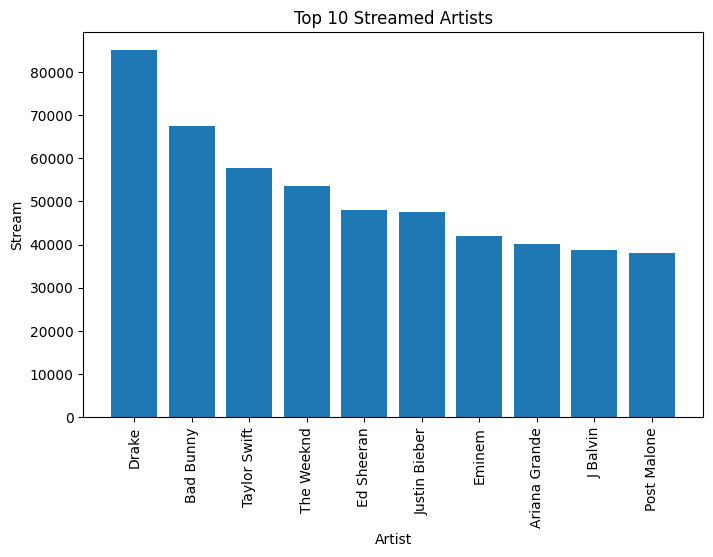

In [39]:
plt.figure(figsize = (8,5))
plt.bar(top10_streamed_artists['Artist'], top10_streamed_artists['Streams'])
plt.xlabel('Artist')
plt.ylabel('Stream')
plt.xticks(rotation = 90)
plt.title('Top 10 Streamed Artists')
plt.show()

In [40]:
top10_daily_artists = df.sort_values(by = 'Daily', ascending = False).head(10)
top10_daily_artists


,Artist,Streams,Daily,As lead,Solo,As feature
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
101,Olivia Rodrigo,12161.1,71.896,12159.0,10909.5,2.1
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
11,Travis Scott,37489.0,38.359,18839.2,14960.2,18649.7
225,Peso Pluma,7553.2,37.826,3507.1,1098.2,4046.1
57,KAROL G,17727.4,28.284,12291.8,5550.3,5435.6
45,Lana Del Rey,20052.2,24.470,18194.9,16379.3,1857.3
485,Zach Bryan,4001.4,24.173,4001.4,3781.4,NaN


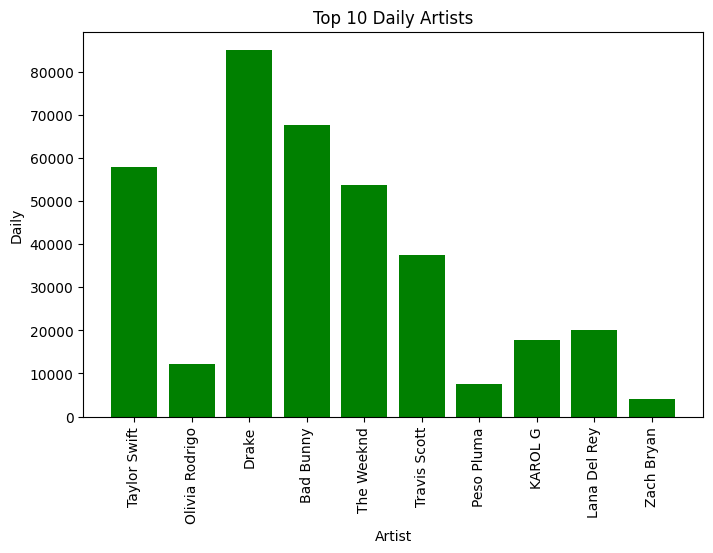

In [41]:
plt.figure(figsize = (8,5))
plt.bar(top10_daily_artists['Artist'], top10_daily_artists['Streams'], color = ['Green'])
plt.xlabel('Artist')
plt.ylabel('Daily')
plt.xticks(rotation = 90)
plt.title('Top 10 Daily Artists')
plt.show()

In [42]:
least_streamed_artists = df.sort_values(by='Streams', ascending=False).tail(10)
least_streamed_artists

,Artist,Streams,Daily,As lead,Solo,As feature
2990,Billy Ocean,730.3,0.439,730.3,729.9,NaN
2991,The Band CAMINO,730.2,0.489,692.2,646.4,38.0
2992,Joseph Vincent,730.1,0.261,719.6,658.4,10.6
2993,Majestic,729.9,0.489,625.0,37.9,104.9
2994,"Grover Washington, Jr.",729.9,0.466,727.5,208.1,2.4
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,NaN
2999,Ayra Starr,728.6,1.881,418.4,380.8,310.1


Text(0.5, 1.0, 'Least Streamed Artists')

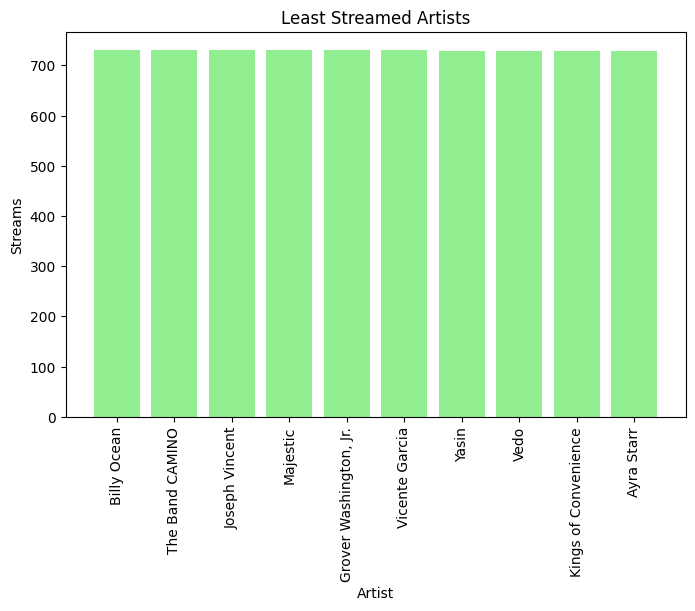

In [43]:
plt.figure(figsize=(8, 5))
plt.bar(least_streamed_artists['Artist'], least_streamed_artists['Streams'], color='lightgreen')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.title('Least Streamed Artists')

In [19]:
least_daily_streamed_artists = df.sort_values(by='Streams', ascending=False).tail(10)
least_daily_streamed_artists


,Artist,Streams,Daily,As lead,Solo,As feature
2990,Billy Ocean,730.3,0.439,730.3,729.9,NaN
2991,The Band CAMINO,730.2,0.489,692.2,646.4,38.0
2992,Joseph Vincent,730.1,0.261,719.6,658.4,10.6
2993,Majestic,729.9,0.489,625.0,37.9,104.9
2994,"Grover Washington, Jr.",729.9,0.466,727.5,208.1,2.4
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,NaN
2999,Ayra Starr,728.6,1.881,418.4,380.8,310.1


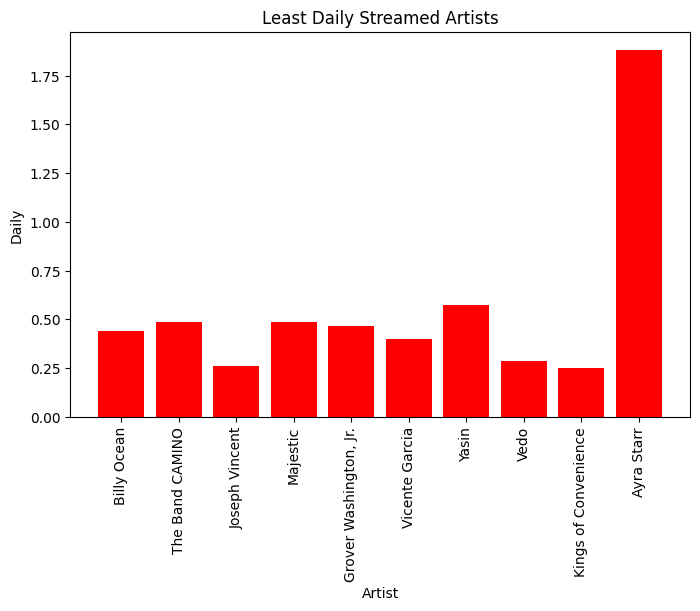

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(least_daily_streamed_artists['Artist'], least_daily_streamed_artists['Daily'], color='Red')
plt.xlabel('Artist')
plt.ylabel('Daily')
plt.xticks(rotation=90)
plt.title('Least Daily Streamed Artists')
plt.show()

In [21]:
top10_lead_artists = df.sort_values(by = 'As lead', ascending = False).head(10)
top10_lead_artists

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
6,Eminem,42029.0,20.175,35475.8,21576.7,6553.2
9,Post Malone,38002.7,21.095,34494.0,18943.9,3508.6
7,Ariana Grande,40111.0,17.158,33219.8,23307.3,6891.2
12,BTS,35778.0,14.960,32041.3,28991.6,3736.7
19,Billie Eilish,29173.3,19.313,29173.3,25240.5,NaN


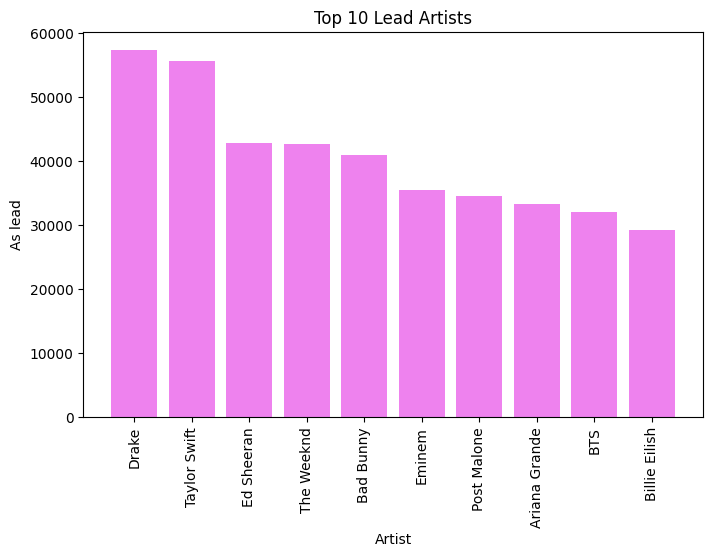

In [45]:
plt.figure(figsize = (8,5))
plt.bar(top10_lead_artists['Artist'], top10_lead_artists['As lead'], color = 'violet')
plt.xlabel('Artist')
plt.ylabel('As lead')
plt.xticks(rotation = 90)
plt.title('Top 10 Lead Artists')
plt.show()

In [46]:
top10_solo_artists = df.sort_values(by = 'Solo', ascending = False).head(10)
top10_solo_artists

,Artist,Streams,Daily,As lead,Solo,As feature
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
12,BTS,35778.0,14.960,32041.3,28991.6,3736.7
19,Billie Eilish,29173.3,19.313,29173.3,25240.5,NaN
7,Ariana Grande,40111.0,17.158,33219.8,23307.3,6891.2
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
22,Imagine Dragons,28100.5,16.133,26430.9,22543.8,1669.6
24,Coldplay,27526.1,14.860,25154.3,22329.9,2371.8


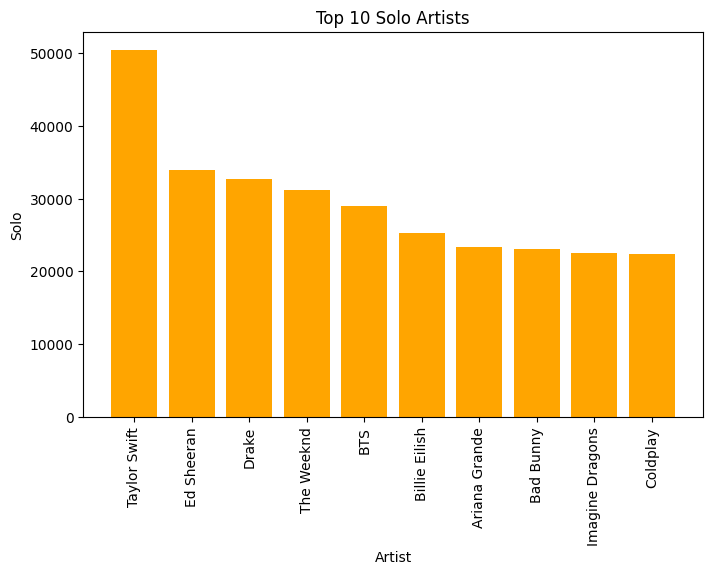

In [47]:
plt.figure(figsize = (8,5))
plt.bar(top10_solo_artists['Artist'], top10_solo_artists['Solo'], color = 'orange')
plt.xlabel('Artist')
plt.ylabel('Solo')
plt.xticks(rotation = 90)
plt.title('Top 10 Solo Artists')
plt.show()

In [48]:
top10_featured_artists = df.sort_values(by='As feature', ascending=False).head(10)
top10_featured_artists

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
8,J Balvin,38774.8,11.784,17450.7,5699.8,21324.2
17,Nicki Minaj,30759.8,16.361,10631.1,6013.9,20128.7
5,Justin Bieber,47525.7,18.868,27988.0,17183.9,19537.7
14,Ozuna,33315.0,13.737,13957.5,6226.7,19357.5
11,Travis Scott,37489.0,38.359,18839.2,14960.2,18649.7
28,Lil Wayne,26657.9,11.466,10013.0,2787.0,16644.9
16,Future,31001.7,20.513,15374.1,7299.6,15627.6
44,Farruko,20784.1,8.096,5669.1,3160.4,15115.0


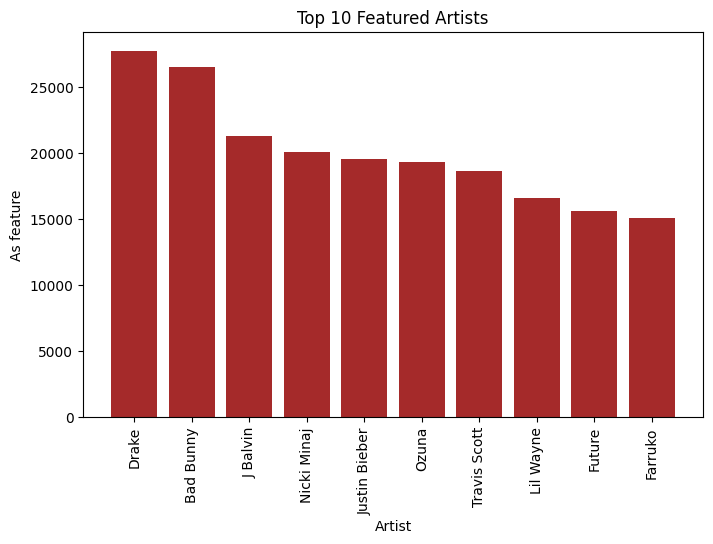

In [49]:
plt.figure(figsize=(8, 5))
plt.bar(top10_featured_artists['Artist'], top10_featured_artists['As feature'], color='brown')
plt.xlabel('Artist')
plt.ylabel('As feature')
plt.xticks(rotation=90)
plt.title('Top 10 Featured Artists')
plt.show()

In [50]:
heatmap = df.corr(numeric_only=True)

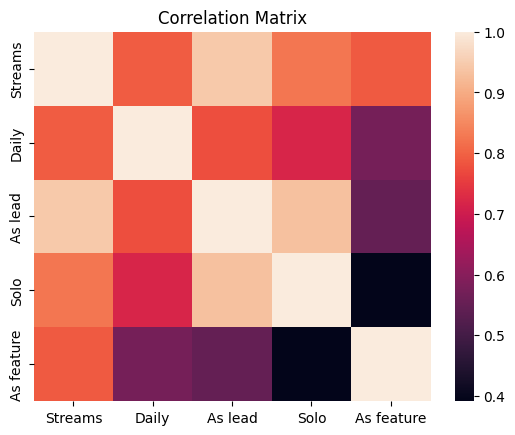

In [51]:
sns.heatmap(data=heatmap)
plt.title('Correlation Matrix')
plt.show()